In [1]:
from src.segment_tools import DataLoader, Data
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

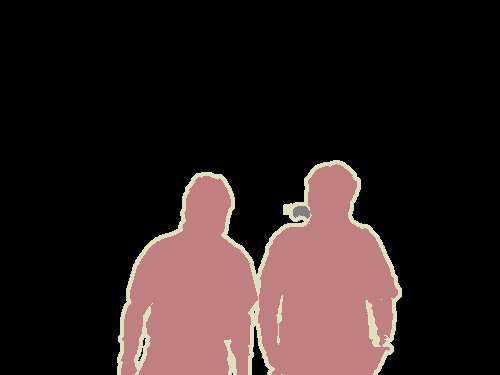

In [2]:
from glob import glob
p = '/content/data/OpenSourceDatasets/VOCdevkit/VOC2012/SegmentationClass'
l = glob("%s/*.png"%p)
from PIL import Image
Image.open(l[800])

In [3]:
#couple of things to do 
#1 reclass everything to common values 0-n classes
#2 generate a one-hot vectorization  
#3 resize all the images to a fixed size.

In [3]:
wd = '/content/data/OpenSourceDatasets'
d = Data('freiburg',wd )
freiburg_mapping = [0,170,255,102,60,120]
labels=['None','Road','Grass','Vegetation','Tree','Sky']
d.resize_data(nrows=720,ncols=500)
d.remap_data(freiburg_mapping)

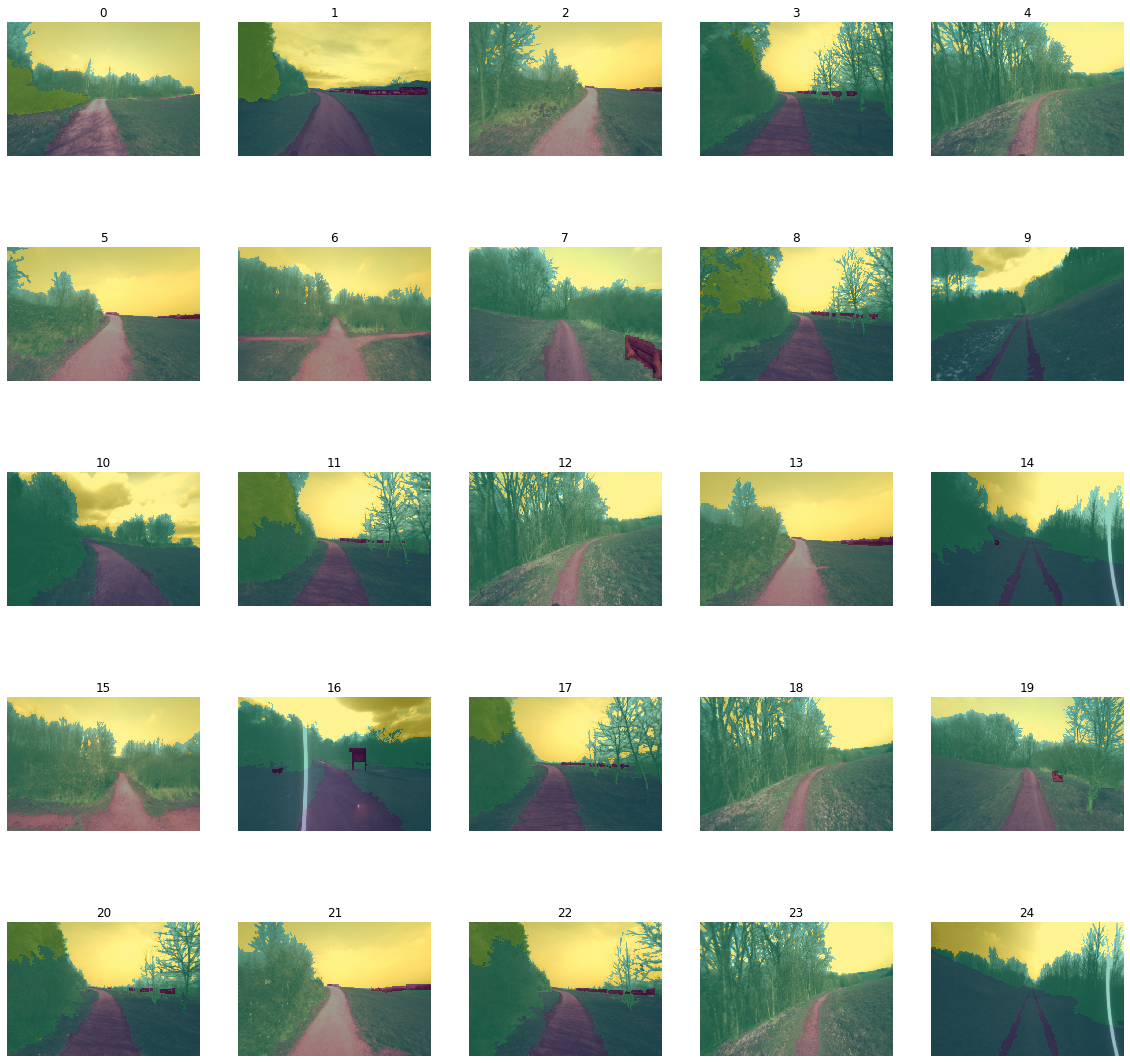

In [4]:
ii, jj = 5, 5  
idx = np.reshape(np.arange(ii*jj),(ii,jj))
f, ax = plt.subplots(ii,jj,figsize=(20,20))
for i in range(ii):
    for j in range(jj):
        im_i = idx[i][j]
        ax[i][j].imshow(d.im[im_i])
        ax[i][j].imshow(d.gt[im_i],vmin=0, vmax=5, alpha=0.5)
        ax[i][j].set_axis_off()
        ax[i][j].set_title('%s'%im_i)

In [5]:
#fit the deeplab_model?
xtrain = np.array([np.array(im) for im in d.im])/255.
#write a one hot encoder
ytrain = np.moveaxis(np.array([[(s==i).astype('int8') for i in range(5)] for s in d.gt]),1,-1)

In [1]:
#import deeplabv3+
from deeplabv3p import Deeplabv3
deeplab_model = Deeplabv3(input_shape=(500,720,3),classes=5)

Using TensorFlow backend.


AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [ ]:
from keras import optimizers
adam = optimizers.Adam(lr=0.01)
deeplab_model.compile(loss='categorical_crossentropy', optimizer=adam)

In [130]:
history = deeplab_model.fit(xtrain,ytrain,batch_size=6,epochs=5)

ValueError: Error when checking target: expected activation_21 to have 3 dimensions, but got array with shape (230, 500, 720, 5)

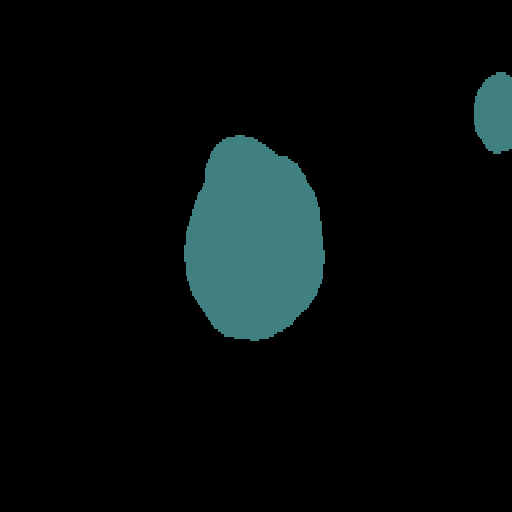

In [94]:
d.gt[0]

In [85]:
yhat = y.reshape((len(x), 512,512,21))

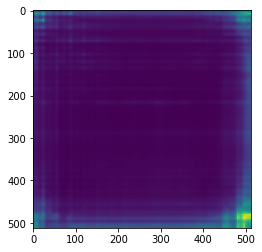

In [93]:
plt.imshow(yhat[100][:,:,20])

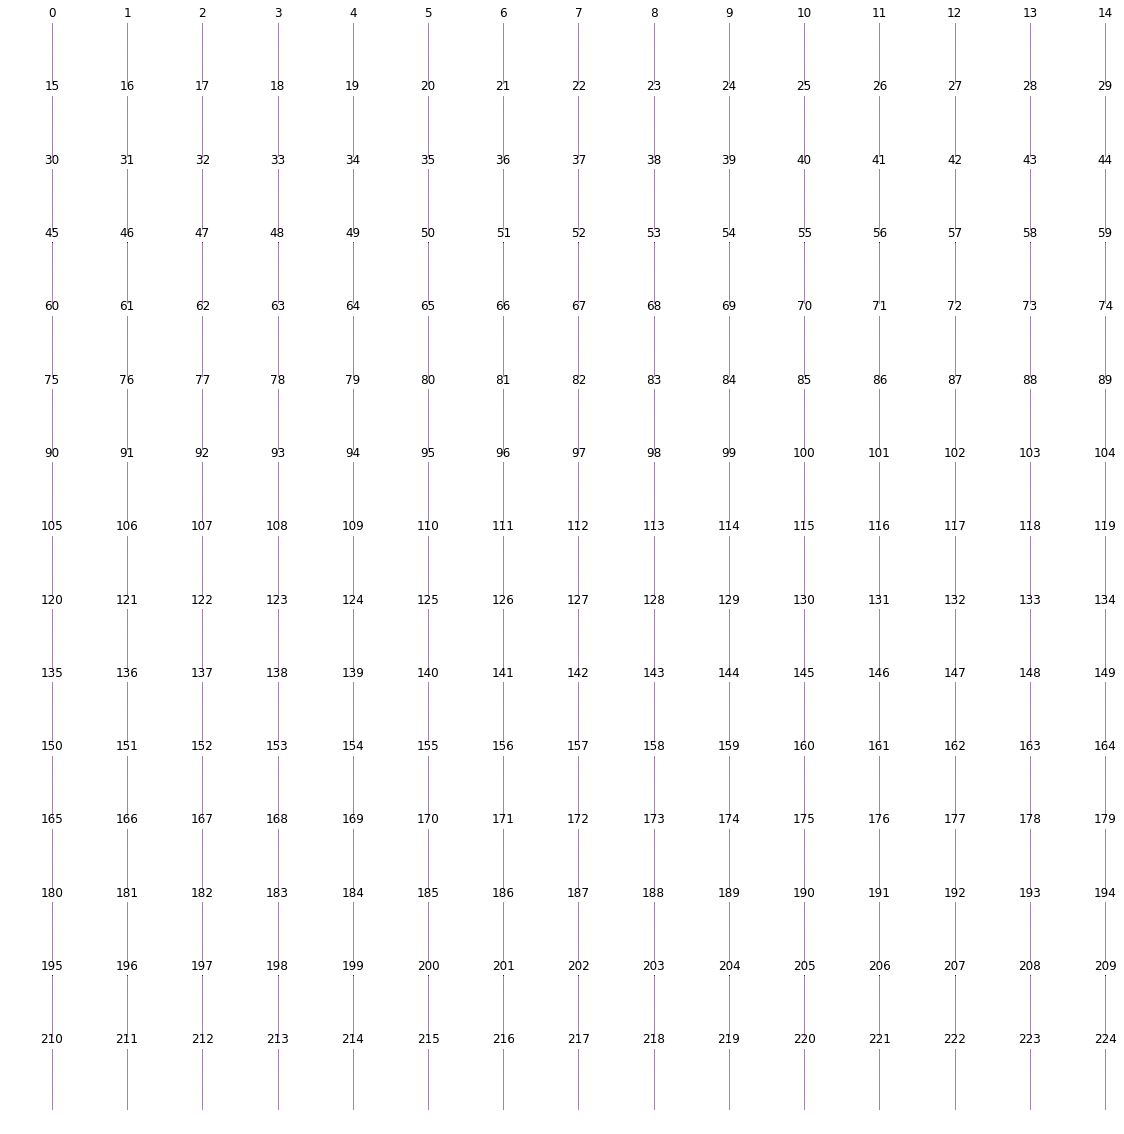

In [32]:
ii, jj = 15, 15  
idx = np.reshape(np.arange(ii*jj),(ii,jj))
f, ax = plt.subplots(ii,jj,figsize=(20,20))
for i in range(ii):
    for j in range(jj):
        im_i = idx[i][j]
        ax[i][j].imshow(x[im_i])
        ax[i][j].imshow(y[im_i],vmin=0, vmax=5, alpha=0.5)
        ax[i][j].set_axis_off()
        ax[i][j].set_title('%s'%im_i)

In [ ]:

dataset = 'HYTA/2GT'
gt = sorted(glob('/datadrive/datasets/%s/*'%dataset))
seg = [np.array(Image.open(g)) for g in gt]

dataset = 'HYTA/images'
gt = sorted(glob('/datadrive/datasets/%s/*'%dataset))
im = [np.array(Image.open(g)) for g in gt]


In [ ]:
#this is for msrc review data 
tree_imgs = np.arange(351,371)
idx = np.reshape(np.arange(20),(5,4))
f, ax = plt.subplots(5,4, figsize=(20,20))
for i in range(5):
    for j in range(4):
        jj=idx[i,j]+351
        ax[i,j].imshow(d.im[jj])
        ax[i,j].imshow((rgb2gray(np.array(d.gt[jj]))*255).astype(int), alpha=0.5)
        ax[i,j].set_axis_off()
        
msrc_tree_mapping = ([0,27,82,91,118,128])
mapping = sorted([0,114,91,128,27,141,118,45,82,105,72,137,146,173,86,59,27,22,13,132,9,36,40])
print(mapping)
print(len(mapping))       

In [ ]:
#show 576 plots 
im = im[6:]
seg = seg[6:]
ii, jj = 5, 5  
idx = np.reshape(np.arange(ii*jj),(ii,jj))
f, ax = plt.subplots(ii,jj,figsize=(20,20))
for i in range(ii):
    for j in range(jj):
        im_i = idx[i][j]
        ax[i][j].imshow(im[im_i])
        ax[i][j].imshow(seg[im_i], alpha=0.5)
        ax[i][j].set_axis_off()
        ax[i][j].set_title('%s'%im_i)
#looks like 6 forward are okay

In [ ]:
# this dataset could work too...